<a href="https://colab.research.google.com/github/silasautomata/projeto-mercado-de-jogos/blob/main/Projeto_Pr%C3%A1tico_Mercado_Games_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
base_dados = pd.read_csv('/content/PS4_GamesSales.csv', encoding='latin-1')

base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
base_dados.shape

(1034, 9)

In [ ]:
base_dados.isnull().sum() # verifica se ha valores nulos

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


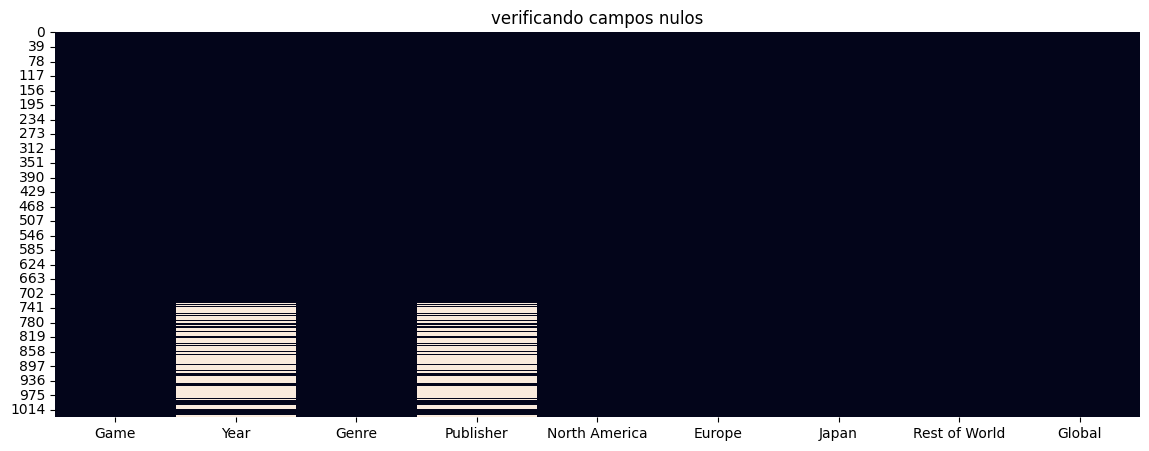

In [ ]:
plt.figure(figsize=(14,5))
plt.title('verificando campos nulos')
sns.heatmap(base_dados.isnull(),cbar=False); #mostra os valores nulos no grafico e retira o cbar do lado do grafico

In [ ]:
base_dados.dropna(inplace=True) #  retira os valores nulos

In [ ]:
base_dados.describe() # estatistica

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


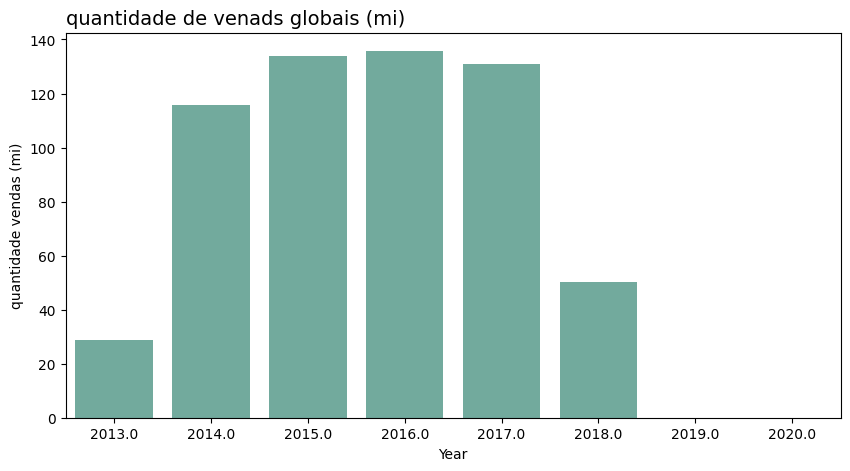

In [ ]:
plt.figure(figsize=(10,5)) # ytamanho da figura

plt.title('quantidade de venads globais (mi)', loc='left', fontsize=14) #titulo do lado esquerdo
         # dataframe eixo x e a coluna 'year', e eixo y a global - retirando as linhas e mudando a cor - e soma os valores para cada ano
sns.barplot(data=base_dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum) # grafico de barra

plt.ylabel('quantidade vendas (mi)'); # label trabalha pela parte de fora dos graficos ex: gerando uma titulo

In [ ]:
                      # localiza as colunas 'YEAR' e remove os anos 2029 e 2020
base_dados = base_dados.loc[ (base_dados['Year']!=2019) & (base_dados['Year']!=2020)]

base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


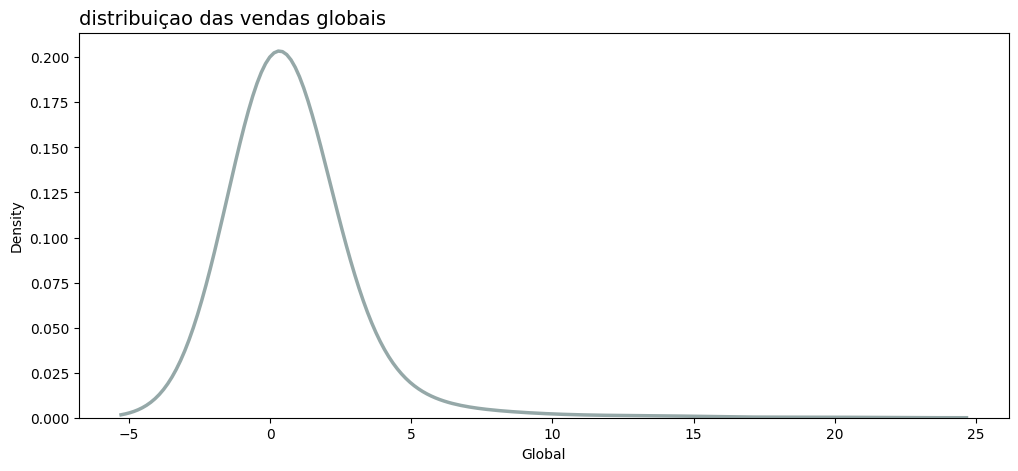

In [ ]:
plt.figure(figsize=(12,5)) # tamanho

#plt.style.use('ggplolt') # estilo

plt.title('distribuiçao das vendas globais', loc='left', fontsize=14 ) # titulo localizado a esquerda, e tamanho da fonte
 # grafico coma a coluna 'global'- com sombra- controla a largura do grafico- muda a cor- define a çargura da linha
sns.kdeplot(base_dados['Global'], shade=False, bw=1, color='#95a8a8',linewidth=2.5);

In [ ]:
# agrupa a coluna 'YEAR' e soma todas as colunas de cada grupo de YEAR
base_dados.groupby(by=['Year']).sum()

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


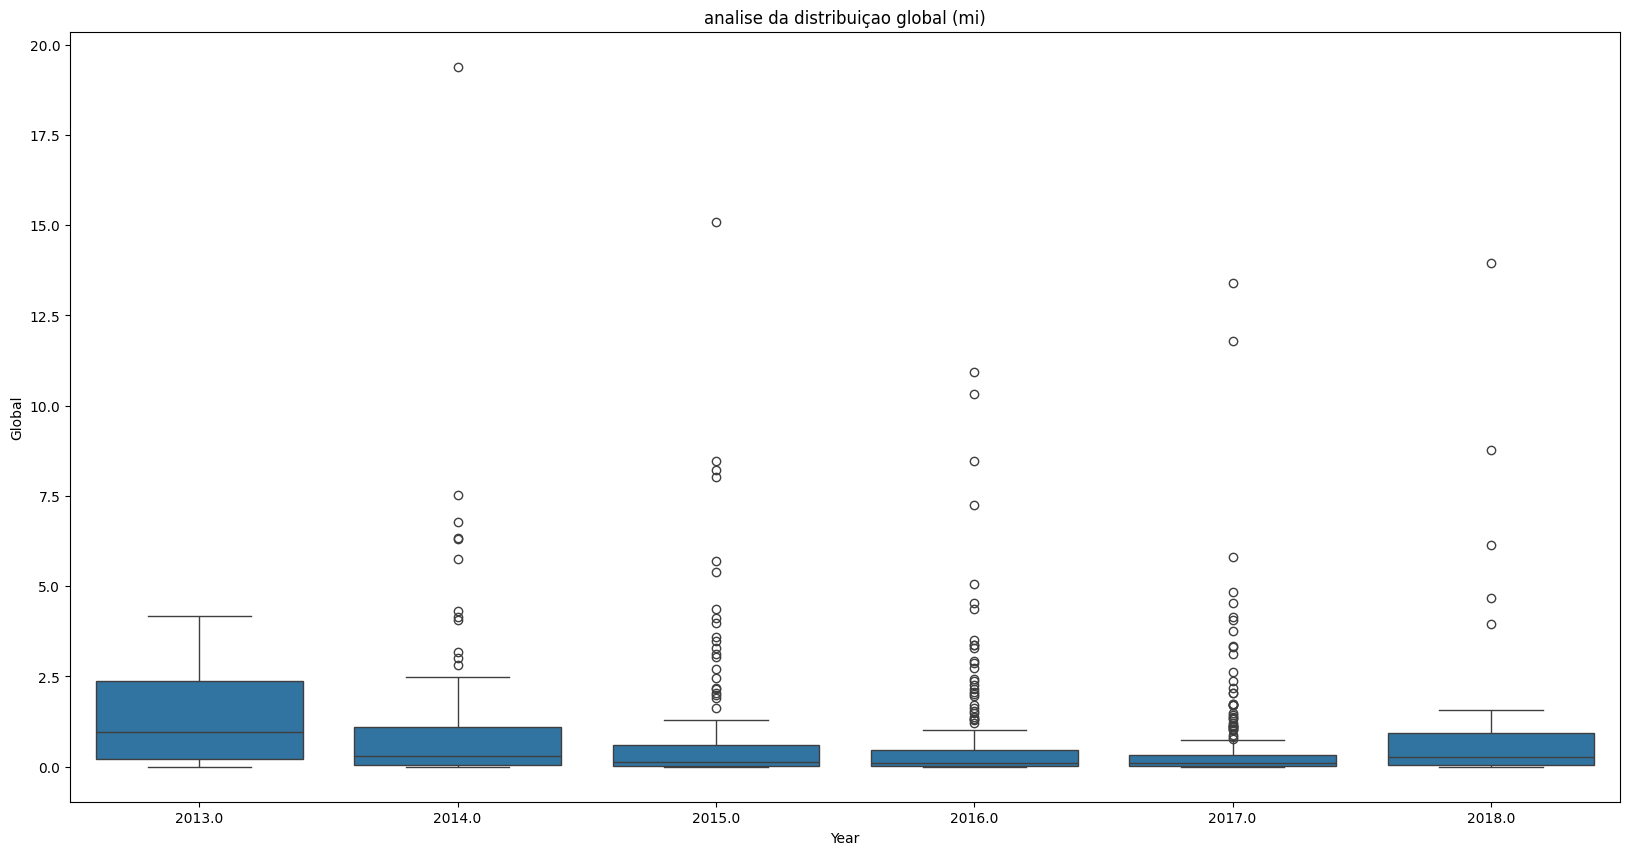

In [ ]:
plt.figure(figsize=(20,10)) # tamanho

plt.title('analise da distribuiçao global (mi)') # titulo

sns.boxplot(data=base_dados,x='Year', y='Global'); # eixo x coluna 'year' e eixo y coluna 'global'

In [ ]:
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,805.000000,805.00000,805.000000,805.000000,805.000000,805.000000
mean,2015.880745,0.26282,0.319342,0.043093,0.114323,0.739652
std,1.192092,0.62659,0.877595,0.121109,0.277537,1.760903
min,2013.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.00000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.05000,0.030000,0.000000,0.020000,0.130000
75%,2017.000000,0.19000,0.230000,0.040000,0.090000,0.570000
max,2018.000000,6.18000,9.710000,2.170000,3.020000,19.390000


In [ ]:
# localiza os numeros da coluna 'global' que sao maiores ou iguai a 10
base_dados.loc[base_dados['Global']>= 10] # top 10 jogos masi vendidos

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [ ]:
base_dados # nova base de daos gerada

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [ ]:
       # agruoa as colunas de 'year' somando os seus dados em cada ano e reseta o index
analise = base_dados.groupby(by=['Year']).sum().reset_index()

In [ ]:

from re import M
# analisando a proporção dos 100% de cada continemente comparado ao Total
# calcula a porcentagem # zip permite pegar duas colunas para fazer a interaçao # faz as divisao entra as colunas de 'nort america' e 'global'
America = [ America / Total * 100 for America, Total in zip( analise['North America'], analise['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( analise['Europe'], analise['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( analise['Japan'], analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( analise['Rest of World'], analise['Global'] ) ]
# no geral com esses codigos fazemos essaS contas
# 6.06/19.39, 9.71/19.39, 0.60/19.39, 3.02/19.39
# no geral ambos trazzem o resultado abaixo

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

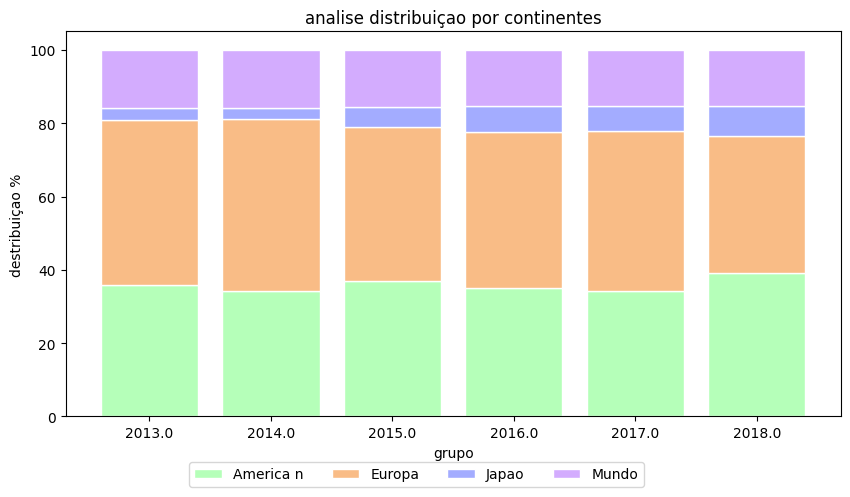

In [ ]:
plt.figure(figsize=(10,5)) # tamamho da figura

# gerando as variaveis
largura_barra = 0.80 # largura da barra
rotulos = analise['Year'] # pega os dados da coluna 'year'
grupos = [0,1,2,3,4,5] # quantidade de anos que tenho no dataframe

# usando as variaveis  no grafico
plt.title('analise distribuiçao por continentes')# titulo
        # valore da america-largura da barra-cor verde-cor da linha branco
plt.bar(grupos,America, width=largura_barra, color='#b5ffb9', edgecolor='white') #
      # valores da europa- largura da barra- cor laranja- cor da linha branco
plt.bar(grupos,Europa,bottom=America,width=largura_barra, color='#f9bc86', edgecolor='white') #
      # valores do japao- largura da barra -cor azul-cor da linha branco
plt.bar(grupos,Japao,bottom=[A+B for A, B in zip(America, Europa)], width=largura_barra, color='#a3acff', edgecolor='white') #
       # valores do mundo no geral qeu sao os 3 paises acima                - largura da barra- cor roxa - cor da linha branco
plt.bar(grupos, Mundo, bottom=[ A+B+C for A,B,C in zip(America, Europa, Japao)], width=largura_barra, color='#d3acfe', edgecolor='white') #

# labels
plt.xticks(grupos, rotulos) # jnomeia cada barra de acordo com os anos
plt.xlabel('grupo') # grupo no eixo Y
plt.ylabel('destribuiçao %') # destribuiçao no eixo Y

# gerar leganda -localizada acima - definindo a posiçaao da legenda- e dividinho ela entra 4 colunas
plt.legend(['America n', 'Europa', 'Japao', 'Mundo',], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);

In [ ]:

base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [ ]:
# bibblioteca sktlearning para machine learning
from sklearn.preprocessing import LabelEncoder # transforma categorias em númerosransforma categorias em números
Funcao_Label = LabelEncoder()
# nome da variavel label

In [ ]:
base_dados['produtor'] = Funcao_Label.fit_transform(base_dados['Publisher'])
# gerando uma nova coluna com a funçao label de transformar categoricos em numeros

In [ ]:
base_dados['genero'] = Funcao_Label.fit_transform(base_dados['Genre'])
# # gerando uma nova coluna com a funçao label de transformar categoricos em numeros

In [ ]:
base_dados['jogo'] = Funcao_Label.fit_transform(base_dados['Game'])
# gerando uma nova coluna com a funçao label de transformar categoricos em numeros

In [ ]:
base_dados.head() # nova base de dados com 3 novas colunas geradas

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,produtor,genero,jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [ ]:
paleta_cores = sns.color_palette('husl', 8) # paleta de cores
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

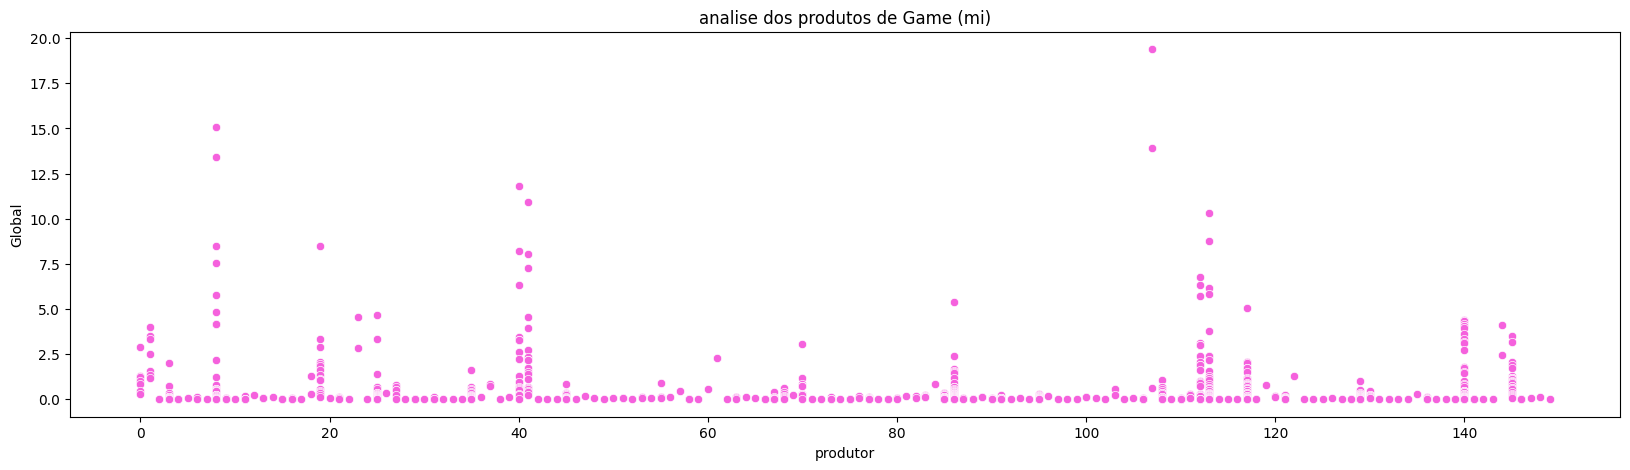

In [ ]:
plt.figure(figsize=(20,5)) # tamanho da figura
plt.title('analise dos produtos de Game (mi)') # titulo
  # grafico com a coluna 'produtor' eixo X e a coluna Y 'global' com uma paleta de cores
sns.scatterplot(data=base_dados, x='produtor', y='Global', color = paleta_cores[7]);

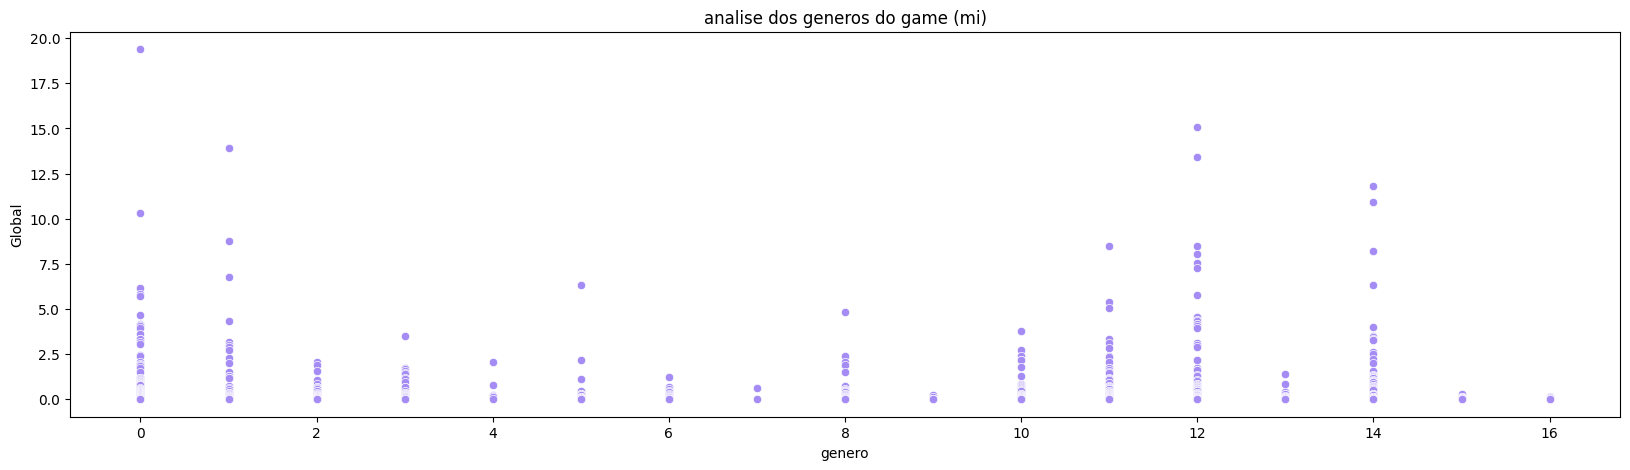

In [ ]:
plt.figure(figsize=(20,5)) # tamanho da figuras
plt.title('analise dos generos do game (mi)')# titulo
 # grafico com a coluna 'genero' eixo X e a coluna Y 'global' com uma paleta de cores
sns.scatterplot(data=base_dados, x='genero', y='Global', color=paleta_cores[6]);

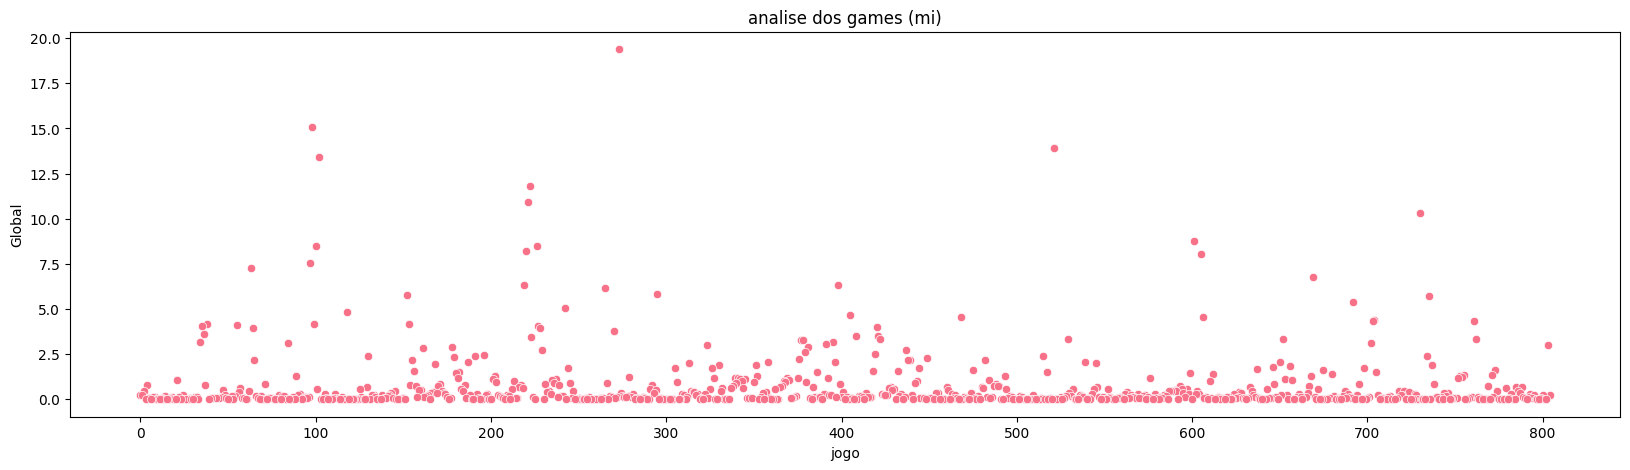

In [ ]:
plt.figure(figsize=(20,5))
plt.title('analise dos games (mi)')
sns.scatterplot(data=base_dados, x='jogo', y='Global', color=paleta_cores[0]);

# **relatorio**

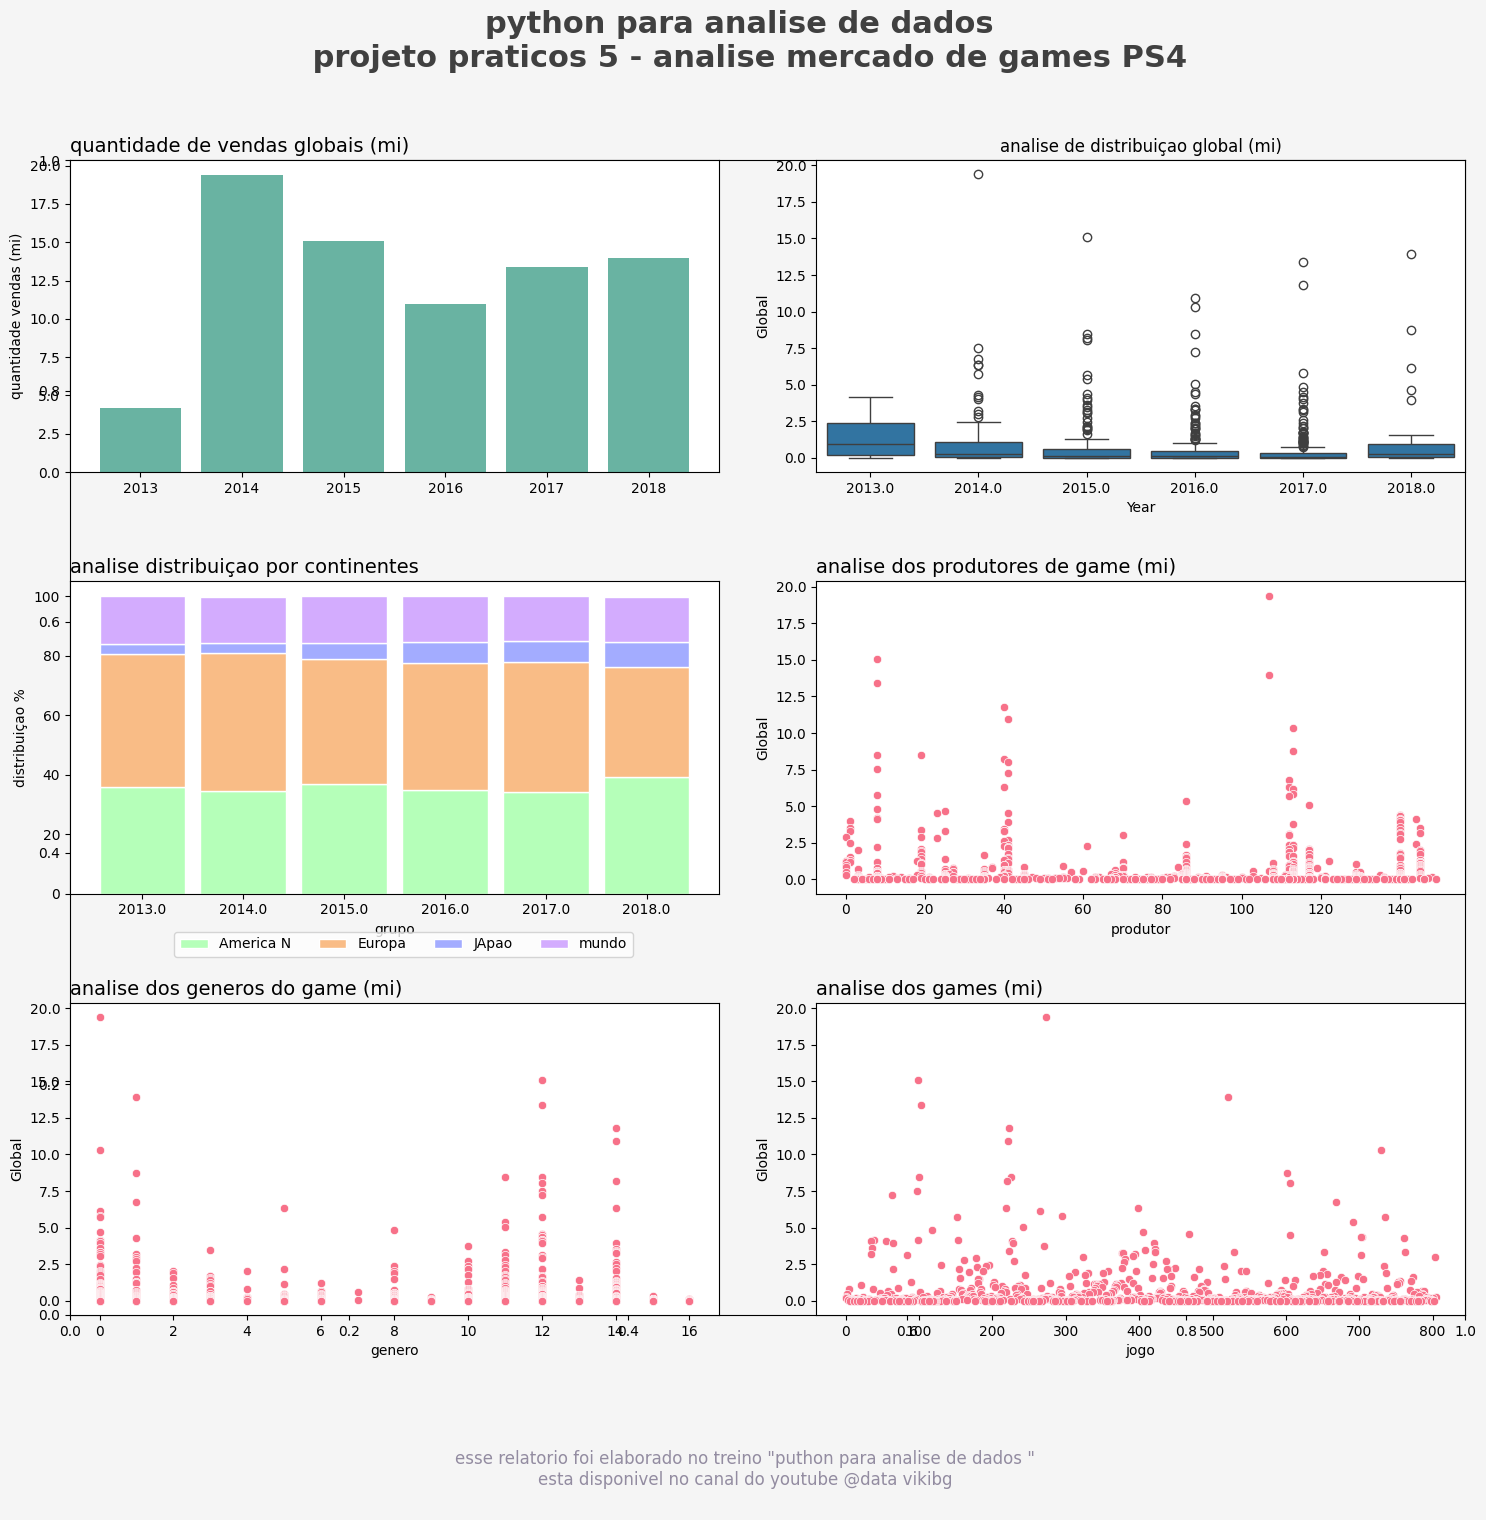

In [ ]:
# relatorio ==> report para o chefe
"""
# tamanho da imagem
fig, ax = plt.subplots(figsize=(18,15))
# cor no fundo
cor_fundo ='#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

#plt.style.use('seaborn')
#titulço da figura
plt.suptitle('python para analise de dados \n projeto praticos 5 - analise mercado de games PS4', fontsize=22, color='#404040', fontweight=600)
#parametro para grid
linhas = 3
colunas = 2

# acessando grafico 1
plt.subplot(linhas,colunas, 1)
#titulo
plt.title('quantidade de vendas globais (mi)', loc='left', fontsize=14)
# grafico
plt.bar(base_dados['Year'],base_dados['Global'], color ='#69b3a2')
# label
plt.ylabel('quantidade vendas (mi)')

# acessando grafico 2
plt.subplot(linhas, colunas, 2)
# titulo
plt.title('analise de distribuiçao global (mi)')
# plot
sns.boxplot(data=base_dados, x='Year', y='Global')

# acessando grafico 3
plt.subplot(linhas,colunas, 3)
# largura barra de grafico
largura_barra = 0.85
rotulos = analise['Year']
grupos = [0,1,2,3,4,5]
# titulo
plt.title('analise distribuiçao por continentes', loc='left', fontsize=14)
# plot da america
plt.bar(grupos, America,width=largura_barra, color ='#b5ffb9', edgecolor='white')
# plot da europa
plt.bar(grupos, Europa, bottom=America, width=largura_barra, color='#f9bc86', edgecolor='white')
# plot do japao
plt.bar(grupos, Japao, bottom=[A+B for A,B in zip(America, Europa)], width=largura_barra, color='#a3acff', edgecolor='white')
# plot do resto do mundo
plt.bar(grupos, Mundo, bottom=[A+B+C for A,B,C in zip(America, Europa, Japao)], width=largura_barra, color='#d3acfe', edgecolor='white')
# labels
plt.xticks(grupos, rotulos)
plt.xlabel('grupo')"""
# relatorio ==> report para o chefe

# tamanho da imagem
fig, ax = plt.subplots(figsize=(18,15)) # cria a figurua e o eixo

cor_fundo ='#f5f5f5' # COR DA FIGURA
ax.set_facecolor(cor_fundo) #  cor de fundo do "eixo" BRANCO
fig.set_facecolor(cor_fundo) #  cor de fundo da figura completa CINZA

#plt.style.use('seaborn')

# titulo da figura - TAMANHO DA FONTE - COR - DEFINE O PESO DA FONTE
plt.suptitle('python para analise de dados \n projeto praticos 5 - analise mercado de games PS4', fontsize=22, color='#404040', fontweight=600)

# parametro para o grid
linhas = 3  # 3 linhas
colunas = 2 # 2 colunas

                                  #GRAFICO EM CADA GRID

#ACESSANDO GRAFICO 1 = barra
plt.subplot(linhas,colunas, 1)

plt.title('quantidade de vendas globais (mi)', loc='left', fontsize=14)

plt.bar(base_dados['Year'],base_dados['Global'], color ='#69b3a2')

plt.ylabel('quantidade vendas (mi)')

#ACESSANDO GRAFICO 2 = boxplot

plt.subplot(linhas, colunas, 2)

plt.title('analise de distribuiçao global (mi)')

sns.boxplot(data=base_dados, x='Year', y='Global')

#plt.subplot(linhas,colunas, 2) #duplicate subplot command

#plt.title('analise de distribuiçao global (mi)')

#ACESSANDO GRAFICO 3 # barra

plt.subplot(linhas, colunas, 3)

largura_barra = 0.85 # largura da barra
rotulos = analise['Year'] # analise da coluna 'year'
grupos = [0,1,2,3,4,5] # grupos sao os anso analisados que total sao 6

plt.title('analise distribuiçao por continentes', loc='left', fontsize=14) # titulo-largura-cor-cor da linha branca

plt.bar(grupos, America,width=largura_barra, color ='#b5ffb9', edgecolor='white')# america barra verde

plt.bar(grupos, Europa, bottom=America, width=largura_barra, color='#f9bc86', edgecolor='white') # europa barra laranja

plt.bar(grupos, Japao, bottom=[A+B for A,B in zip(America, Europa)], width=largura_barra, color='#a3acff', edgecolor='white') # japa roxo escuro

plt.bar(grupos, Mundo, bottom=[A+B+C for A,B,C in zip(America, Europa, Japao)], width=largura_barra, color='#d3acfe', edgecolor='white') # mundo roxo claro

plt.xticks(grupos, rotulos)
plt.xlabel('grupo') # eixos fora do grafico x
plt.ylabel('distribuiçao %') #eixos fora do grafico Y

plt.legend(['America N','Europa', 'JApao', 'mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4); # cria a legenda=localizao esquerda-colorando ela no angulo do meio-dividindo os grupos em 4

#ACESSANDO GRAFICO 4
plt.subplot(linhas, colunas, 4)
plt.title('analise dos produtores de game (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='produtor', y='Global', color=paleta_cores[0]);# escaterplot das colunas 'produtor' e 'global'

#ACESSANDO GRAFICO 5
plt.subplot(linhas, colunas, 5)
plt.title('analise dos generos do game (mi)', loc='left',fontsize=14 )
sns.scatterplot(data=base_dados, x ='genero', y='Global', color=paleta_cores[0]); # escaterplot das colunas 'genero' e 'global'

#ACESSANDO GRAFICO 6
plt.subplot(linhas, colunas, 6)
plt.title('analise dos games (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='jogo', y='Global', color=paleta_cores[0]); # escaterplot das colunas 'jogo' e 'global'

# ajuste o layout
plt.subplots_adjust(hspace=0.35, wspace=0.15) # ajusta o espaço entre os graficos

# rodape
rodape ='''
esse relatorio foi elaborado no treino "puthon para analise de dados "
esta disponivel no canal do youtube @data vikibg
'''

#incluindo o rodape no relatorio
fig.text(0.5, -0.02, rodape, ha='center', va='bottom', size=12, color='#938ca1');



Este projeto tem como objetivo analisar dados de vendas de jogos de PS4 para entender as tendências do mercado e os fatores que influenciam o sucesso dos jogos. Os dados foram coletados do site vgchartz.com e incluem informações sobre o nome do jogo, editora, gênero, vendas globais e vendas por região. As vendas são medidas em milhões de unidades vendidas.

Objetivo do projeto: O objetivo deste projeto é fornecer insights sobre o mercado de jogos de PS4, incluindo:

Os jogos mais vendidos globalmente
Os jogos mais vendidos por região
Os editores mais bem-sucedidos
Os gêneros mais populares
Os fatores que influenciam o sucesso dos jogos